In [1]:
import func 
import networkx as nx
import matplotlib.pyplot as plt
import markov_clustering as mc


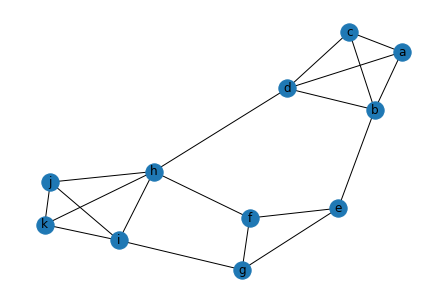

In [2]:
def make_graph():
    '''
    This is just to test of the conversion works 
    '''

    G = nx.Graph()
    G.add_nodes_from("abcdefghijk")

    #cluster 1
    G.add_edges_from([('a','b'), ('b', 'd'), ('d', 'c'), ('c', 'a'), ('b', 'c'), ('a', 'd')]) 

    #cluster 2
    G.add_edges_from([('h','i'), ('i', 'k'), ('k', 'j'), ('j', 'h'), ('h', 'k'), ('j', 'i')])

    #cluster 3
    G.add_edges_from([('e','f'), ('f', 'g'), ('g', 'e')])
    
    #links
    G.add_edges_from([('b','e'), ('d', 'h'), ('g', 'i'), ('f', 'h')])

    return G

G0 = make_graph()
nx.draw(G0, with_labels = True)

In [3]:
adj_matrix = nx.adjacency_matrix(G0) 

result = mc.run_mcl(adj_matrix)         
clusters = mc.get_clusters(result) 

print(clusters)

[(0, 1, 2, 3), (4, 5, 6), (7, 8, 9, 10)]


/var/folders/qm/5krpz0vd1n5g2tknvt69wkx00000gn/T/ipykernel_38229/2977807975.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G0)


In [4]:

# clusters that should form which it is
clusters = [('a', 'b', 'c', 'd'), ('e', 'f', 'g'), ('h', 'i', 'j', 'k')]
edges = G0.edges()
# print(edges)

def get_weight(G, cluster1, cluster2):
    '''
    G -> the orginal unweighetd network
    cluster1 -> a cluster after MCL
    cluster2 -> a different cluster after MCL 

    returns the number of edges from cluster1 to cluster2
    '''
    weight = 0

    for node1 in cluster1:
        for node2 in cluster2:
            if G.has_edge(node1, node2):
                weight += 1
    
    return weight

def convert_to_weighted(G_orginal, clusters):
    G = nx.Graph()
    
    #Creates a graph with nodes as each cluster
    nodes = [i for i in range(len(clusters))]
    G.add_nodes_from(nodes)

    i = 0
    while i < len(clusters) - 1:

        j = i + 1
        while j < len(clusters):
            weight = get_weight(G_orginal, clusters[i], clusters[j])
            G.add_edge(i ,j, weight = weight)
            j += 1

        i += 1

    return G


Graph with 3 nodes and 3 edges


{(0, 1): Text(-0.04688607741077333, 0.4808446148464107, '1'),
 (0, 2): Text(-0.45311392258922634, -0.16762345014217517, '1'),
 (1, 2): Text(0.5000000000000003, -0.3132211647042352, '2')}

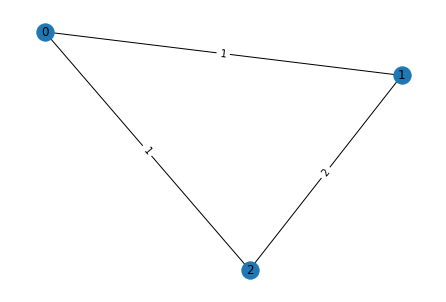

In [5]:
weighted_G = convert_to_weighted(G0, clusters)
print(weighted_G)
G = weighted_G

#Finds positions of nodes
pos = nx.spring_layout(G)

# plots it
nx.draw(G, pos, with_labels = True)
labels = nx.get_edge_attributes(G,'weight')

#adds the edges in
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [6]:
print(G0.nodes)
print(clusters[0])
print(clusters[1])

paths = func.between_centrality(G0, clusters[0], clusters[1])
print(paths)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
('a', 'b', 'c', 'd')
('e', 'f', 'g')
{'b': 0.75, 'e': 0.6666666666666666, 'a': 0.0, 'c': 0.0, 'd': 0.0, 'f': 0.0, 'g': 0.0}


['tab:green', 'tab:green', 'tab:green', 'tab:green', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:red', 'tab:red']


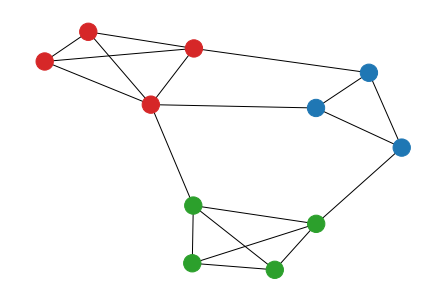

In [7]:
# h = func.cluster_graph(G0, *clusters)
# nx.draw(h)
func.cluster_visualise(G0, *clusters)
